In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option("display.max_columns",999)
pd.set_option("display.max_row",999)

In [5]:
# Reading the data files

train = pd.read_csv('train_data_w_weather.csv')
test = pd.read_csv('../test.csv')
weather_data = pd.read_csv('../weather.csv')

### Models

## Predicting the number of mosquitoes 

(then, holding that equal...?
DRAFT:
let's say Num = beta1 * Temperature + beta2 * X ...
then if ProbWnvPresent is expressed as f(beta1 * Num + beta2 * Temperature + beta3 * X ...), how... --> PCA.

 ## PCA
 *Test*

### Finding values correlated with WnvPos

Correlation between number of mosquitoes and WnvPos

- *for a given trap & species*

In [284]:
train.Date.unique()

(95,)

In [290]:
date_ind = pd.DataFrame(train.Date.unique(), columns=["All_Dates"])

In [182]:
first_training_data_ = train[(train.Species=="CULEX PIPIENS/RESTUANS") & (train.Trap=="T002")].copy().reset_index(drop=True)

In [183]:
first_training_data = first_training_data_[["Date", "NumMosquitos", "WnvPresent"]].copy()

In [184]:
first_training_data.head()

,Date,NumMosquitos,WnvPresent
0,2007-05-29,1,0
1,2007-06-05,3,0
2,2007-06-26,1,0
3,2007-06-29,2,0
4,2007-07-02,3,0


In [277]:
first_training_data.Date.unique().shape

(63,)

In [296]:
merge=pd.merge(date_ind, first_training_data, how="left", left_on="All_Dates", right_on="Date").drop("Date", axis=1)
merge["NumMosquitos"]=merge["NumMosquitos"].fillna(value=0)

In [297]:
merge

,All_Dates,NumMosquitos,WnvPresent
0,2007-05-29,1.0,0.0
1,2007-06-05,3.0,0.0
2,2007-06-26,1.0,0.0
3,2007-06-29,2.0,0.0
4,2007-07-02,3.0,0.0
5,2007-07-11,18.0,0.0
6,2007-07-18,7.0,0.0
7,2007-07-19,0.0,NaN
8,2007-07-25,0.0,NaN
9,2007-07-27,23.0,0.0


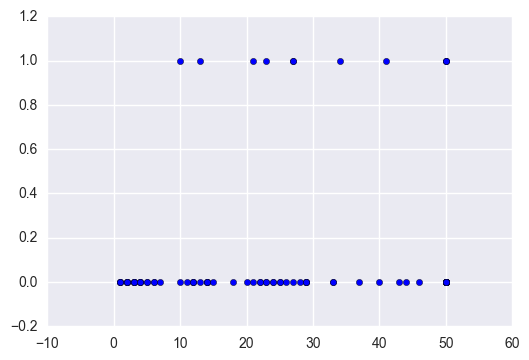

In [298]:
plt.scatter(first_training_data["NumMosquitos"], first_training_data["WnvPresent"])

In [306]:
pd.pivot_table(first_training_data, index="NumMosquitos", values="WnvPresent", aggfunc=(np.sum))
                                                                                

NumMosquitos
1     0
2     0
3     0
4     0
5     0
6     0
7     0
10    1
11    0
12    0
13    1
14    0
15    0
18    0
20    0
21    1
22    0
23    1
24    0
25    0
26    0
27    2
28    0
29    0
33    0
34    1
37    0
40    0
41    1
43    0
44    0
46    0
50    3
Name: WnvPresent, dtype: int64

In [282]:
test_dates=test.Date.unique()

(95,)

---